# Importing the libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from scipy.optimize import minimize
#from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

In [50]:
import os

# Change the current working directory
os.chdir('E:/MSDSM/Sem-1/Matrix Analysis/Matrix Project')

# Now print the current working directory to confirm the change
print("Current Working Directory: ", os.getcwd())


Current Working Directory:  E:\MSDSM\Sem-1\Matrix Analysis\Matrix Project


# Loading the datasets

In [51]:
reliance_data = pd.read_csv("reliance.CSV")
adani_data = pd.read_csv("adani.CSV")
infosys_data = pd.read_csv("infosys.CSV")
tcs_data = pd.read_csv("tcs.CSV")
airtel_data = pd.read_csv("airtel.CSV")
icici_data = pd.read_csv("icici.CSV")

Closing_Price = pd.concat([reliance_data[["Date", "Close"]], adani_data[["Close"]], infosys_data[["Close"]], tcs_data[["Close"]], airtel_data[["Close"]], icici_data[["Close"]]], axis=1)
Closing_Price.columns = ["Date", "Reliance", "Adani", "Infosys", "TCS", "Airtel", "ICICI"]
Stocks = ["Date", "Reliance", "Adani", "Infosys", "TCS", "Airtel", "ICICI"]

Closing_Price

,Date,Reliance,Adani,Infosys,TCS,Airtel,ICICI
0,2003-11-03,77.069092,1.518955,1.518955,38.387501,39.619396,77.069092
1,2003-11-04,76.047897,1.496730,1.496730,38.387501,39.757122,76.047897
2,2003-11-05,75.599197,1.520488,1.520488,38.387501,38.586445,75.599197
3,2003-11-06,76.256783,1.545778,1.545778,38.387501,38.930763,76.256783
4,2003-11-07,74.601212,1.584097,1.584097,38.387501,39.114399,74.601212
...,...,...,...,...,...,...,...
4964,2023-11-07,2323.800049,2233.350098,2233.350098,3370.449951,937.150024,2323.800049
4965,2023-11-08,2335.899902,2259.949951,2259.949951,3381.550049,936.750000,2335.899902
4966,2023-11-09,2310.550049,2214.649902,2214.649902,3347.449951,932.349976,2310.550049
4967,2023-11-10,2314.899902,2205.100098,2205.100098,3333.449951,935.500000,2314.899902


# EDA & Data Cleaning

In [52]:
Closing_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4969 non-null   object 
 1   Reliance  4960 non-null   float64
 2   Adani     4961 non-null   float64
 3   Infosys   4961 non-null   float64
 4   TCS       4961 non-null   float64
 5   Airtel    4960 non-null   float64
 6   ICICI     4960 non-null   float64
dtypes: float64(6), object(1)
memory usage: 271.9+ KB


In [53]:
# Changing the date column to datetime format.
Closing_Price['Date'] = pd.to_datetime(Closing_Price['Date'])  # Convert 'date' column to datetime if it's not already
Closing_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4969 non-null   datetime64[ns]
 1   Reliance  4960 non-null   float64       
 2   Adani     4961 non-null   float64       
 3   Infosys   4961 non-null   float64       
 4   TCS       4961 non-null   float64       
 5   Airtel    4960 non-null   float64       
 6   ICICI     4960 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 271.9 KB


In [54]:
Closing_Price.shape

(4969, 7)

In [55]:
Closing_Price

,Date,Reliance,Adani,Infosys,TCS,Airtel,ICICI
0,2003-11-03,77.069092,1.518955,1.518955,38.387501,39.619396,77.069092
1,2003-11-04,76.047897,1.496730,1.496730,38.387501,39.757122,76.047897
2,2003-11-05,75.599197,1.520488,1.520488,38.387501,38.586445,75.599197
3,2003-11-06,76.256783,1.545778,1.545778,38.387501,38.930763,76.256783
4,2003-11-07,74.601212,1.584097,1.584097,38.387501,39.114399,74.601212
...,...,...,...,...,...,...,...
4964,2023-11-07,2323.800049,2233.350098,2233.350098,3370.449951,937.150024,2323.800049
4965,2023-11-08,2335.899902,2259.949951,2259.949951,3381.550049,936.750000,2335.899902
4966,2023-11-09,2310.550049,2214.649902,2214.649902,3347.449951,932.349976,2310.550049
4967,2023-11-10,2314.899902,2205.100098,2205.100098,3333.449951,935.500000,2314.899902


In [56]:
# Select data for the specified period
start_date = '2022-01-01'
end_date = '2022-06-30'

stock_data_for_period_1 = Closing_Price[(Closing_Price['Date'] >= start_date) & (Closing_Price['Date'] <= end_date)]

# Select data for the specified period
start_date = '2022-02-01'
end_date = '2022-07-31'

stock_data_for_period_2 = Closing_Price[(Closing_Price['Date'] >= start_date) & (Closing_Price['Date'] <= end_date)]

# Select data for the specified period
start_date = '2022-03-01'
end_date = '2022-08-31'

stock_data_for_period_3 = Closing_Price[(Closing_Price['Date'] >= start_date) & (Closing_Price['Date'] <= end_date)]

# Select data for the specified period
start_date = '2022-04-01'
end_date = '2022-09-30'

stock_data_for_period_4 = Closing_Price[(Closing_Price['Date'] >= start_date) & (Closing_Price['Date'] <= end_date)]

# Select data for the specified period
start_date = '2022-05-01'
end_date = '2022-10-31'

stock_data_for_period_5 = Closing_Price[(Closing_Price['Date'] >= start_date) & (Closing_Price['Date'] <= end_date)]

# Select data for the specified period
start_date = '2022-06-01'
end_date = '2022-11-30'

stock_data_for_period_6 = Closing_Price[(Closing_Price['Date'] >= start_date) & (Closing_Price['Date'] <= end_date)]

In [57]:
Closing_Price=pd.DataFrame(Closing_Price)
#Closing_Price['Date'] = pd.to_datetime(Closing_Price['Date'])  # Convert 'date' column to datetime if it's not already
#Closing_Price.set_index('Date',inplace=True)
Closing_Price

,Date,Reliance,Adani,Infosys,TCS,Airtel,ICICI
0,2003-11-03,77.069092,1.518955,1.518955,38.387501,39.619396,77.069092
1,2003-11-04,76.047897,1.496730,1.496730,38.387501,39.757122,76.047897
2,2003-11-05,75.599197,1.520488,1.520488,38.387501,38.586445,75.599197
3,2003-11-06,76.256783,1.545778,1.545778,38.387501,38.930763,76.256783
4,2003-11-07,74.601212,1.584097,1.584097,38.387501,39.114399,74.601212
...,...,...,...,...,...,...,...
4964,2023-11-07,2323.800049,2233.350098,2233.350098,3370.449951,937.150024,2323.800049
4965,2023-11-08,2335.899902,2259.949951,2259.949951,3381.550049,936.750000,2335.899902
4966,2023-11-09,2310.550049,2214.649902,2214.649902,3347.449951,932.349976,2310.550049
4967,2023-11-10,2314.899902,2205.100098,2205.100098,3333.449951,935.500000,2314.899902


In [58]:
# checking for null values
Closing_Price.isnull().sum()

Date        0
Reliance    9
Adani       8
Infosys     8
TCS         8
Airtel      9
ICICI       9
dtype: int64

In [59]:
# treating the null values
Closing_Price = Closing_Price.dropna()
stock_data = Closing_Price.copy()
stock_data = stock_data.reset_index(drop = True)
stock_data = stock_data.drop("Date", axis = 1)
stock_data

,Reliance,Adani,Infosys,TCS,Airtel,ICICI
0,77.069092,1.518955,1.518955,38.387501,39.619396,77.069092
1,76.047897,1.496730,1.496730,38.387501,39.757122,76.047897
2,75.599197,1.520488,1.520488,38.387501,38.586445,75.599197
3,76.256783,1.545778,1.545778,38.387501,38.930763,76.256783
4,74.601212,1.584097,1.584097,38.387501,39.114399,74.601212
...,...,...,...,...,...,...
4955,2323.800049,2233.350098,2233.350098,3370.449951,937.150024,2323.800049
4956,2335.899902,2259.949951,2259.949951,3381.550049,936.750000,2335.899902
4957,2310.550049,2214.649902,2214.649902,3347.449951,932.349976,2310.550049
4958,2314.899902,2205.100098,2205.100098,3333.449951,935.500000,2314.899902


In [60]:
print(stock_data.isnull().sum())
print("*"*20)
print(stock_data.shape)

Reliance    0
Adani       0
Infosys     0
TCS         0
Airtel      0
ICICI       0
dtype: int64
********************
(4960, 6)


In [61]:
stock_data

,Reliance,Adani,Infosys,TCS,Airtel,ICICI
0,77.069092,1.518955,1.518955,38.387501,39.619396,77.069092
1,76.047897,1.496730,1.496730,38.387501,39.757122,76.047897
2,75.599197,1.520488,1.520488,38.387501,38.586445,75.599197
3,76.256783,1.545778,1.545778,38.387501,38.930763,76.256783
4,74.601212,1.584097,1.584097,38.387501,39.114399,74.601212
...,...,...,...,...,...,...
4955,2323.800049,2233.350098,2233.350098,3370.449951,937.150024,2323.800049
4956,2335.899902,2259.949951,2259.949951,3381.550049,936.750000,2335.899902
4957,2310.550049,2214.649902,2214.649902,3347.449951,932.349976,2310.550049
4958,2314.899902,2205.100098,2205.100098,3333.449951,935.500000,2314.899902


# Visualization

Plotting line graphs between the "closing Price" of each stocks and its corresponding "dates".

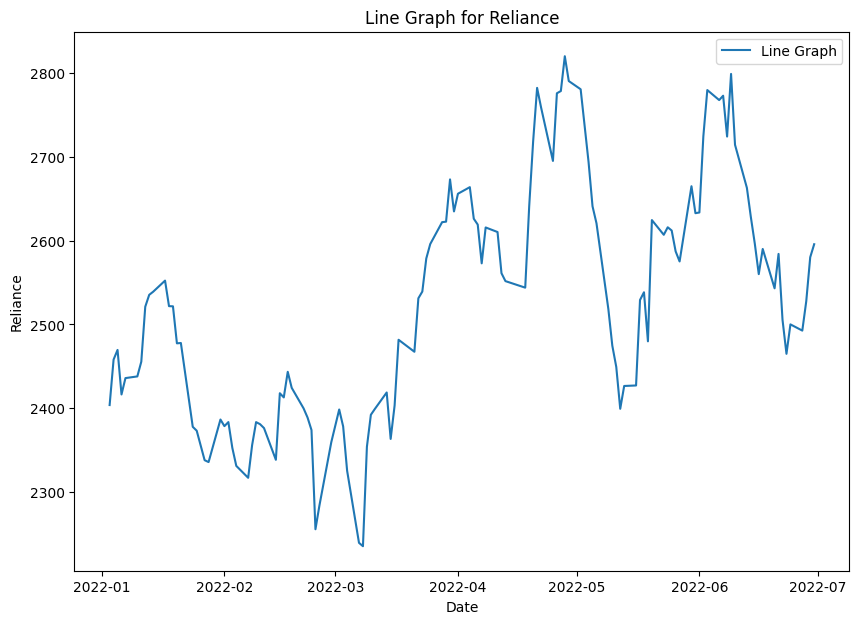

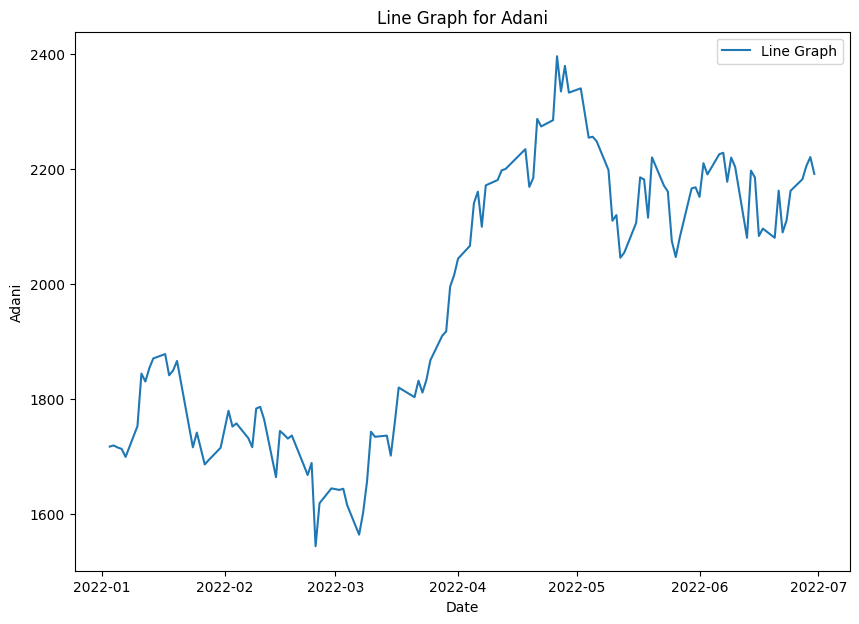

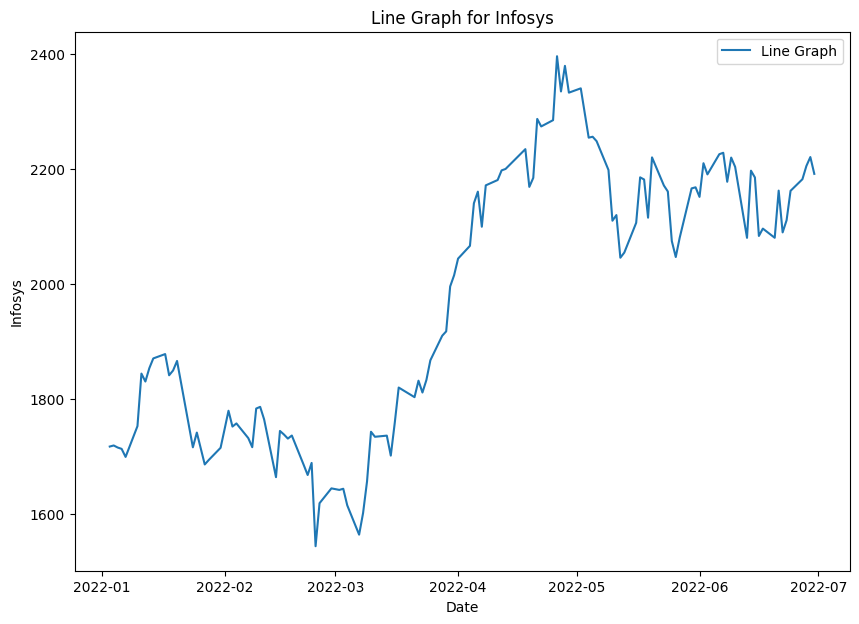

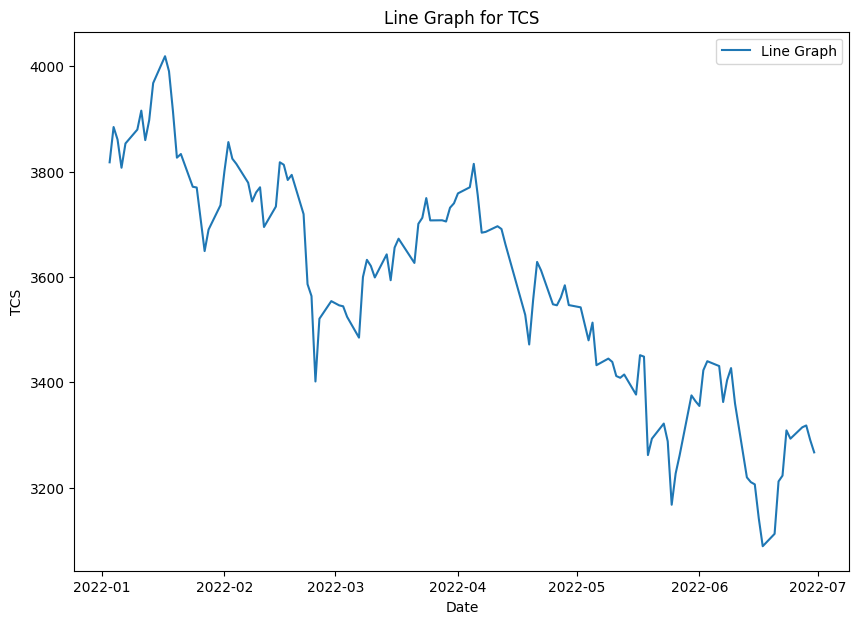

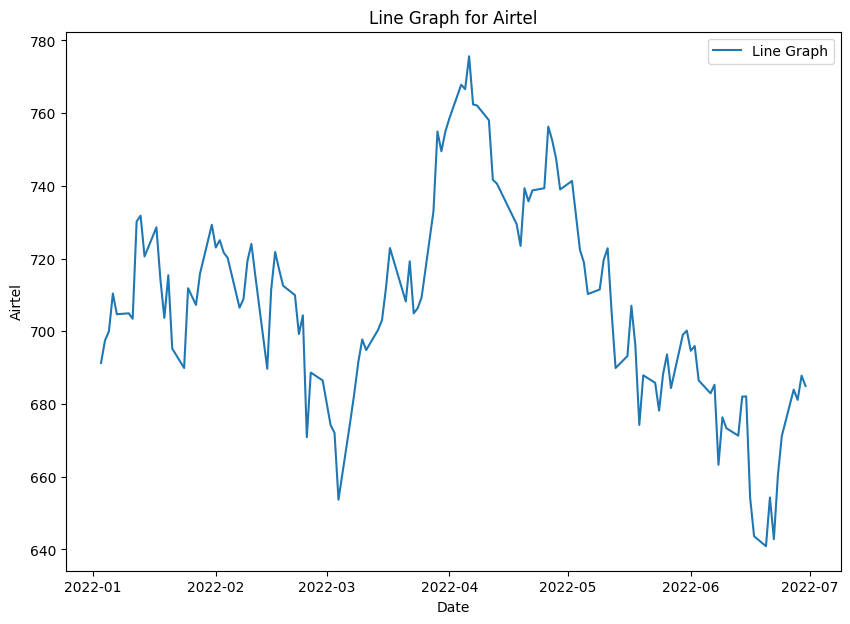

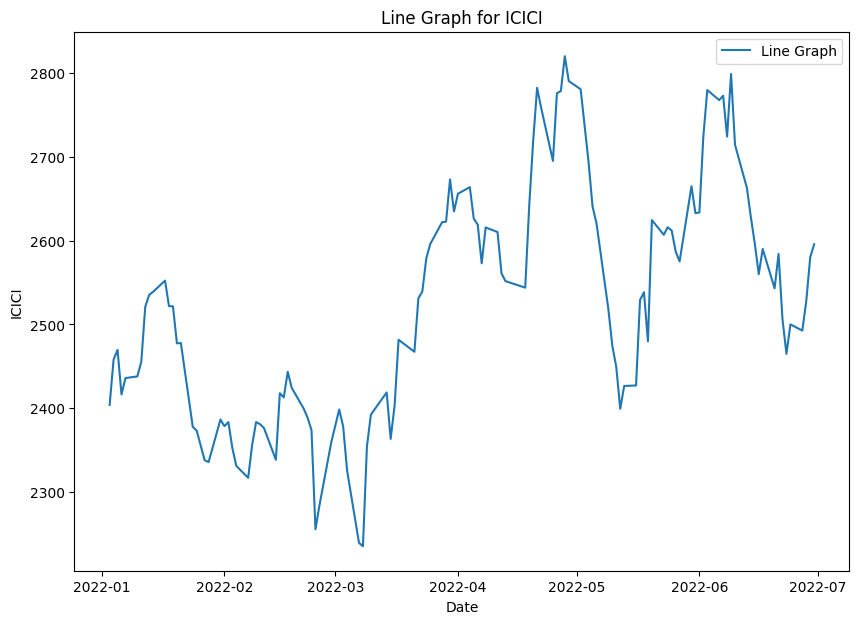

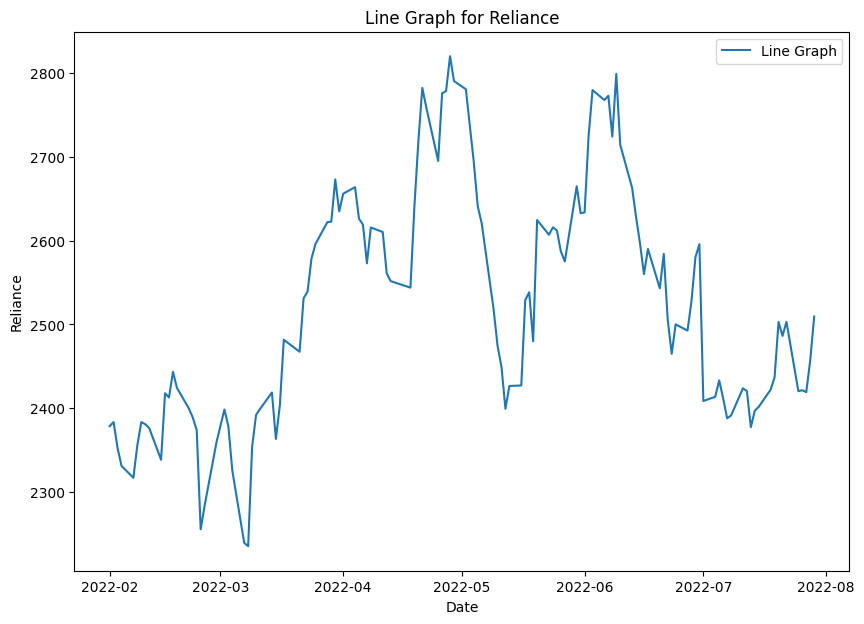

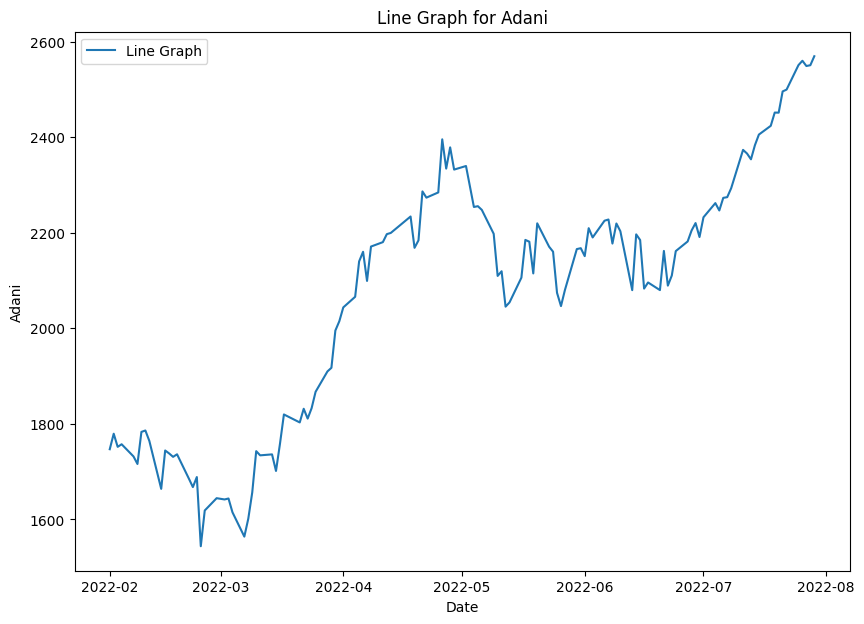

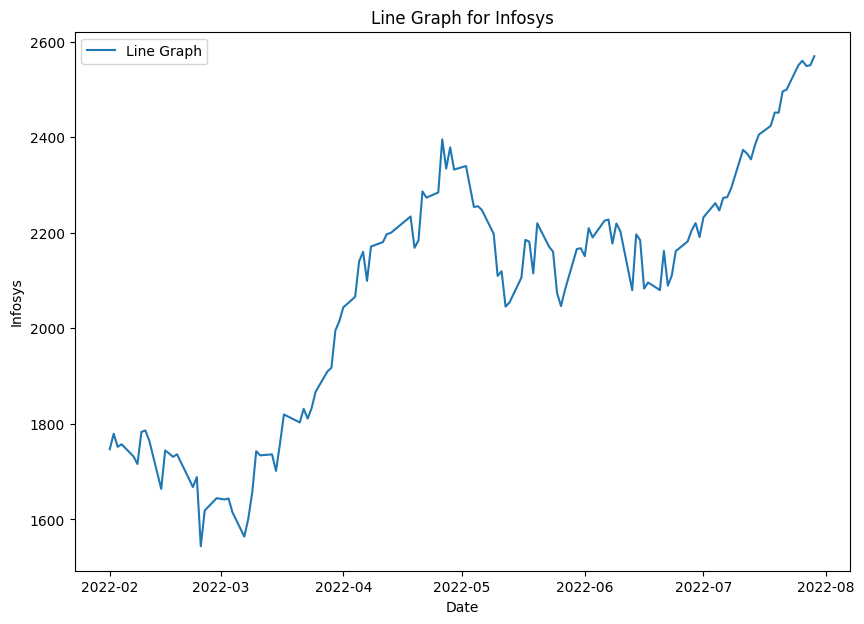

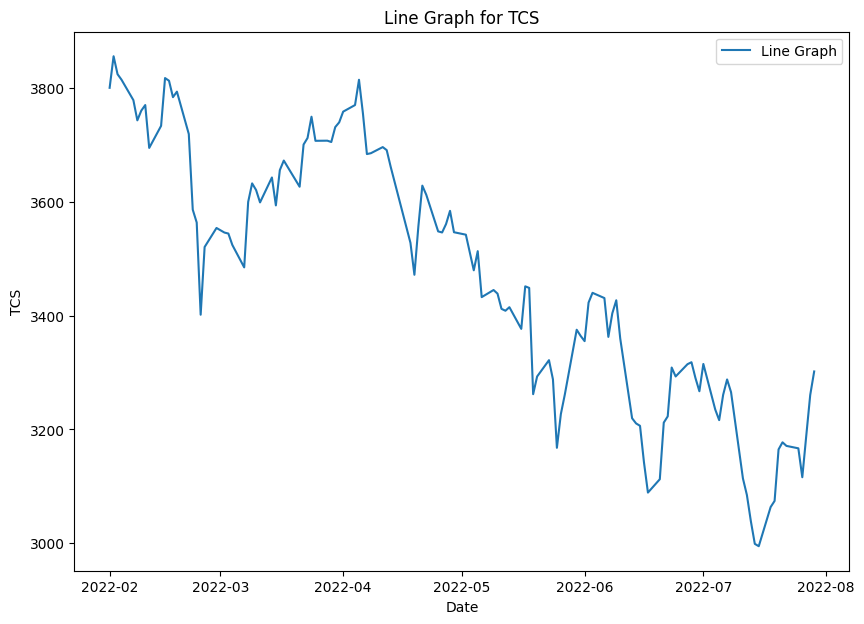

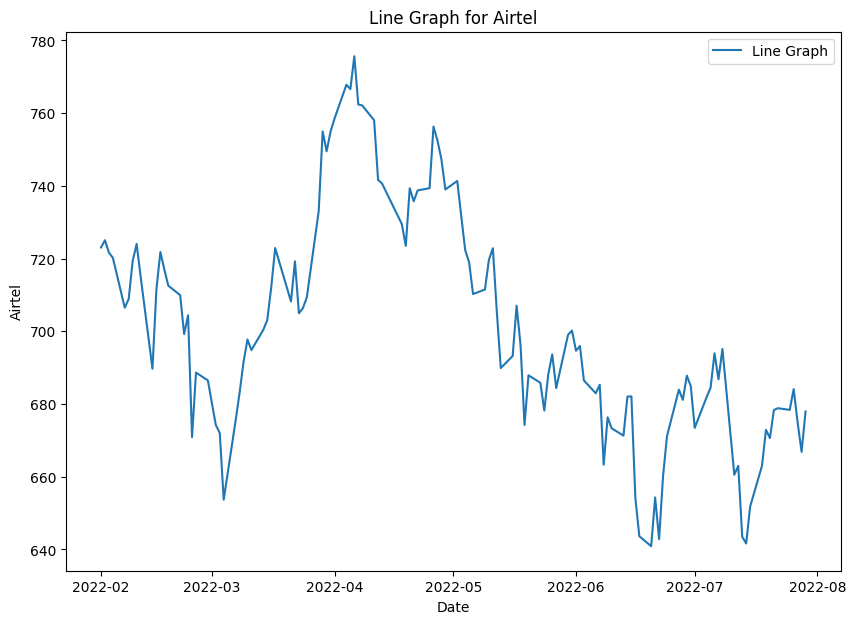

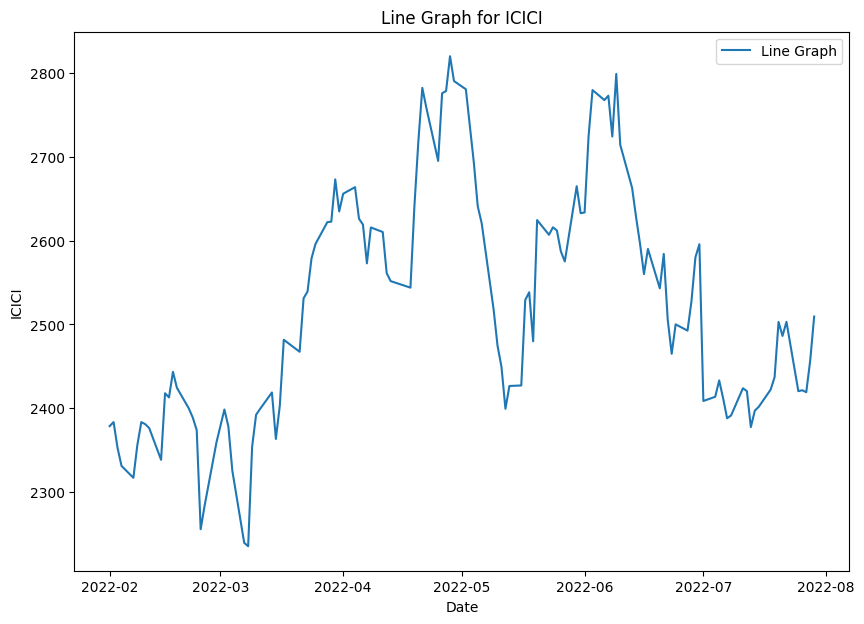

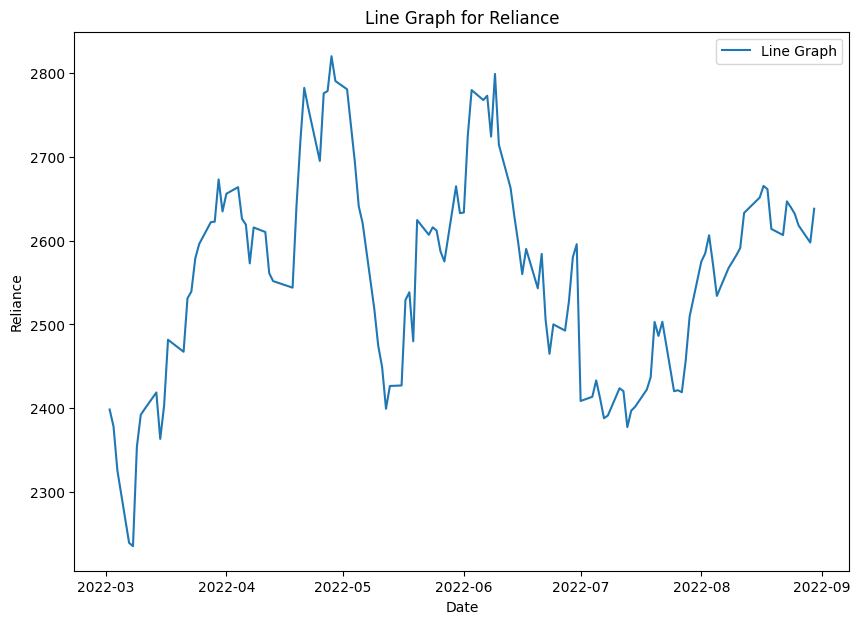

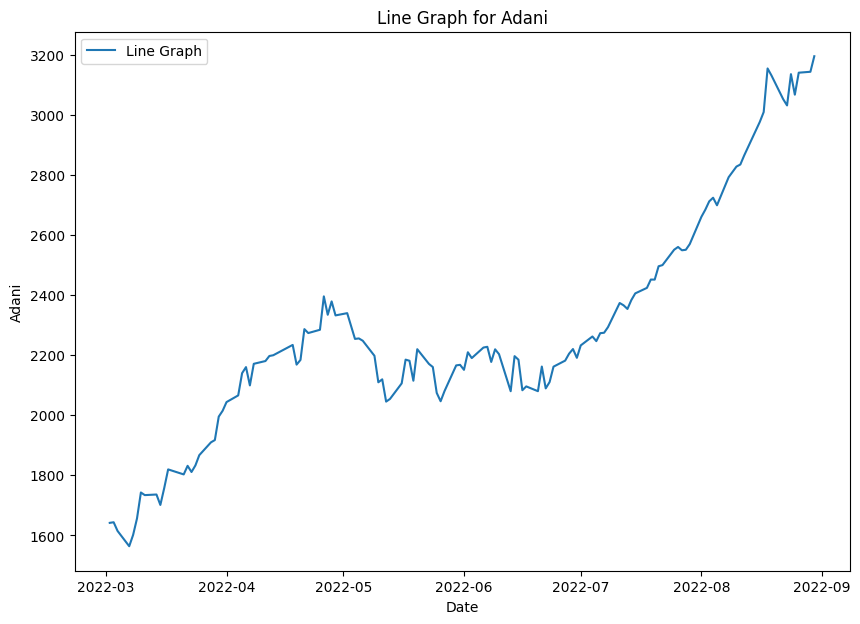

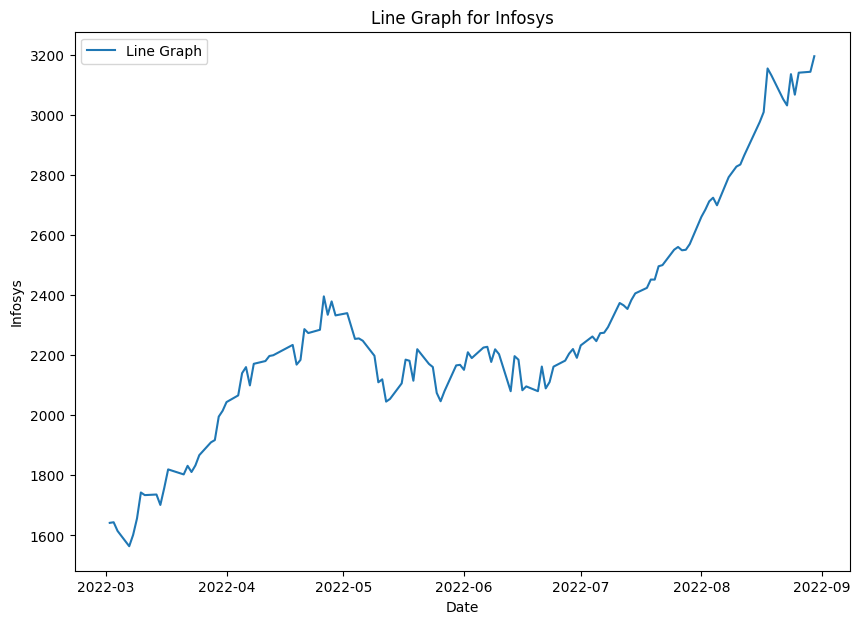

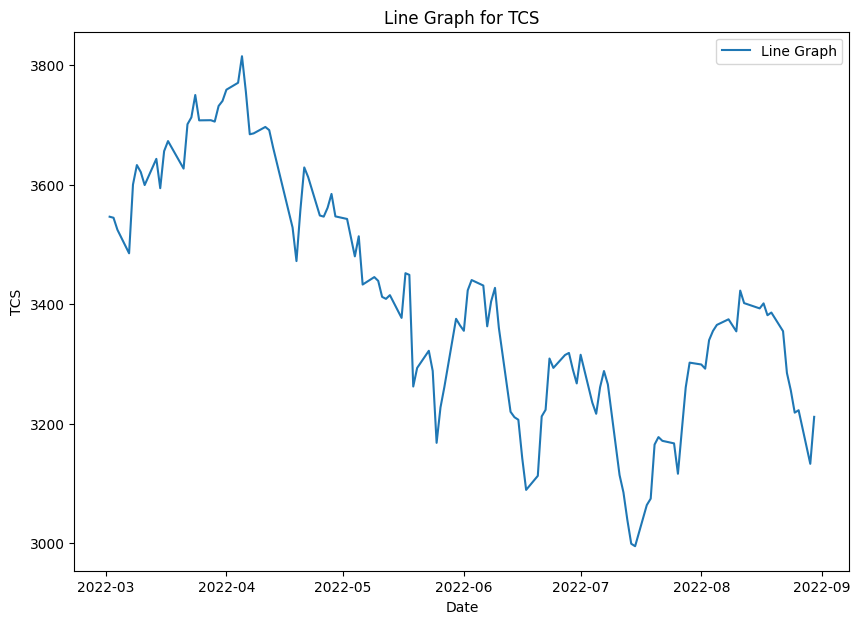

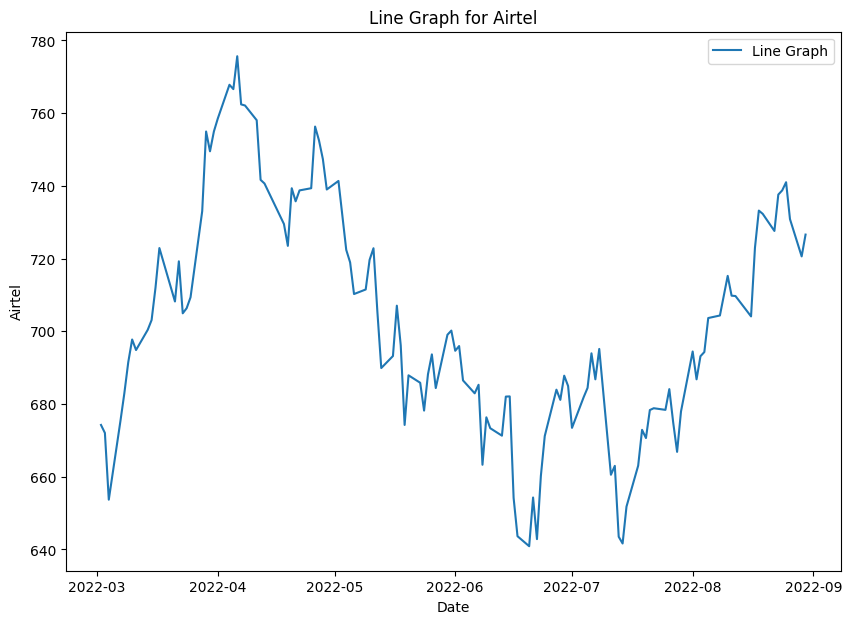

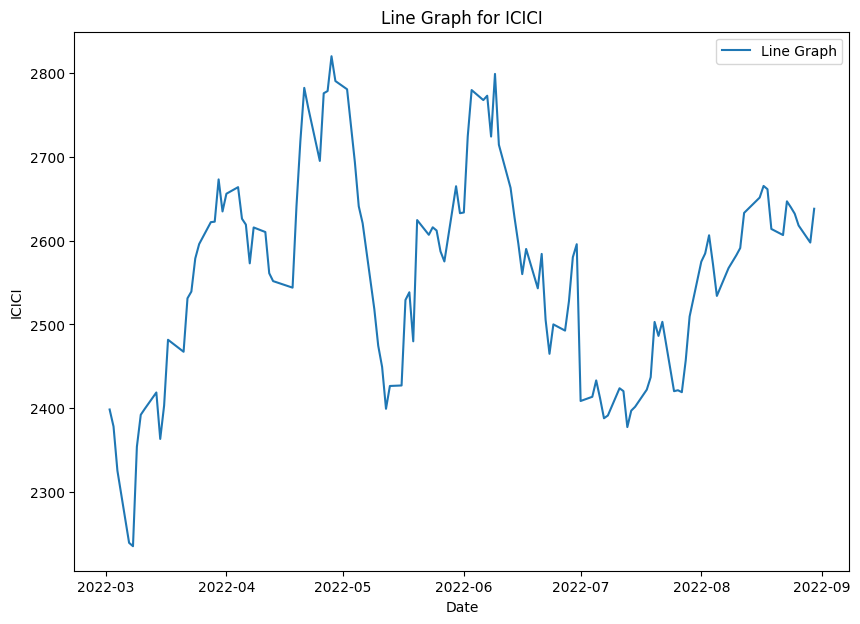

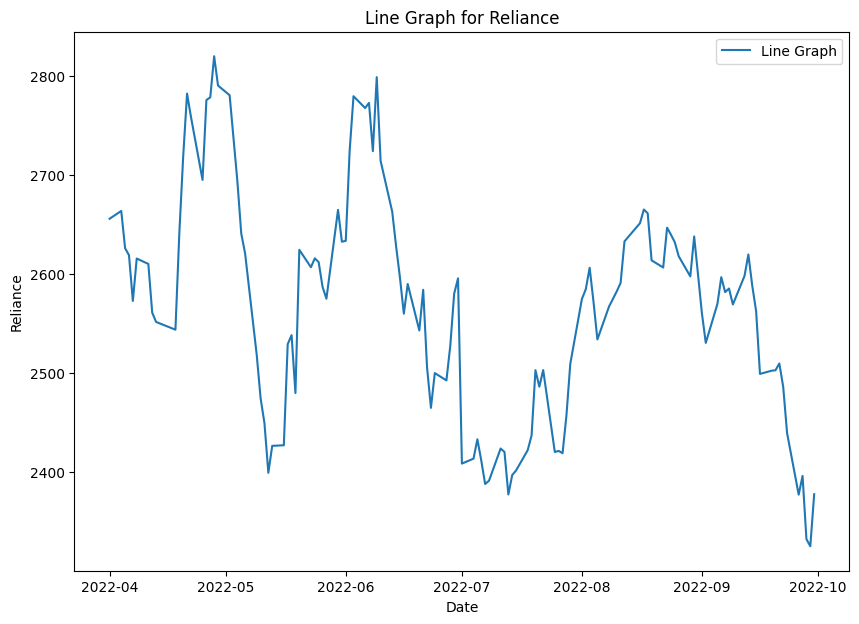

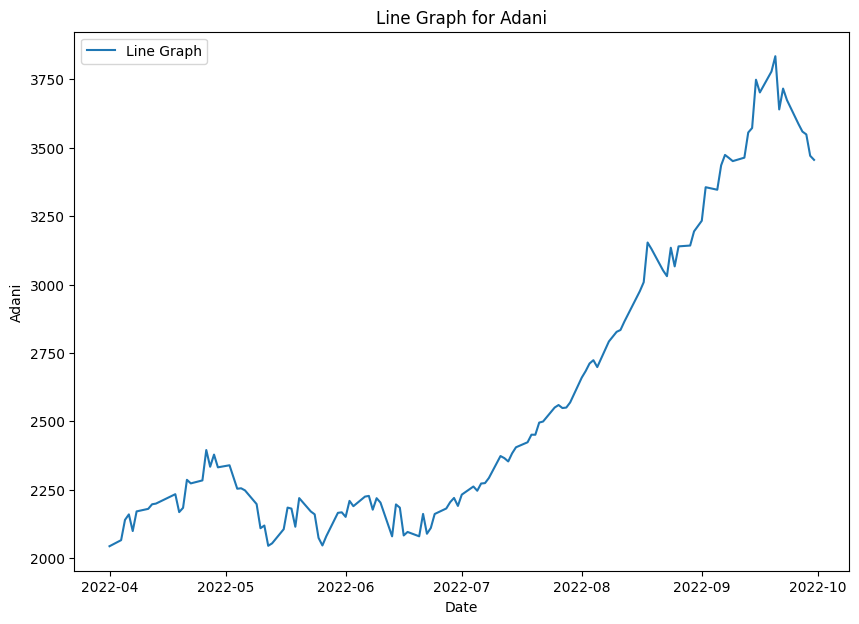

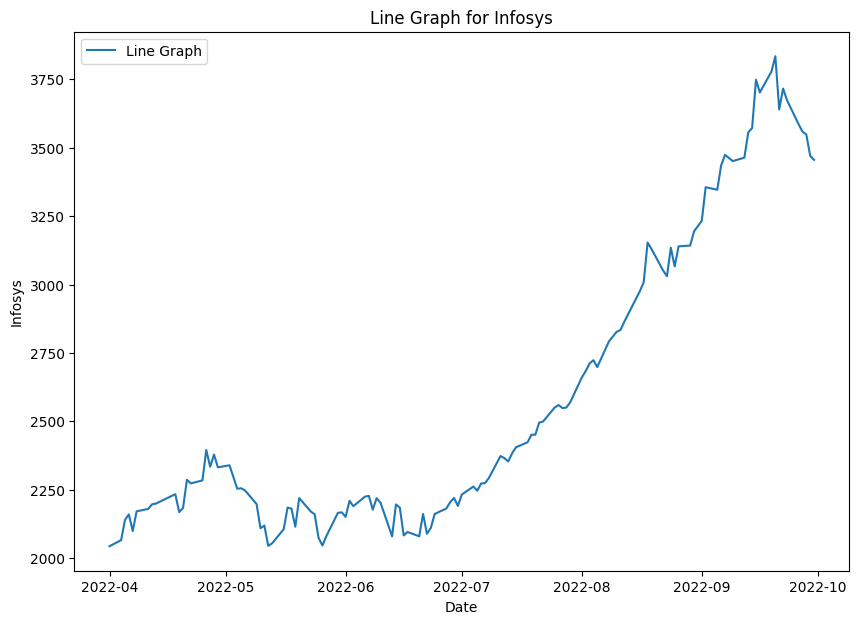

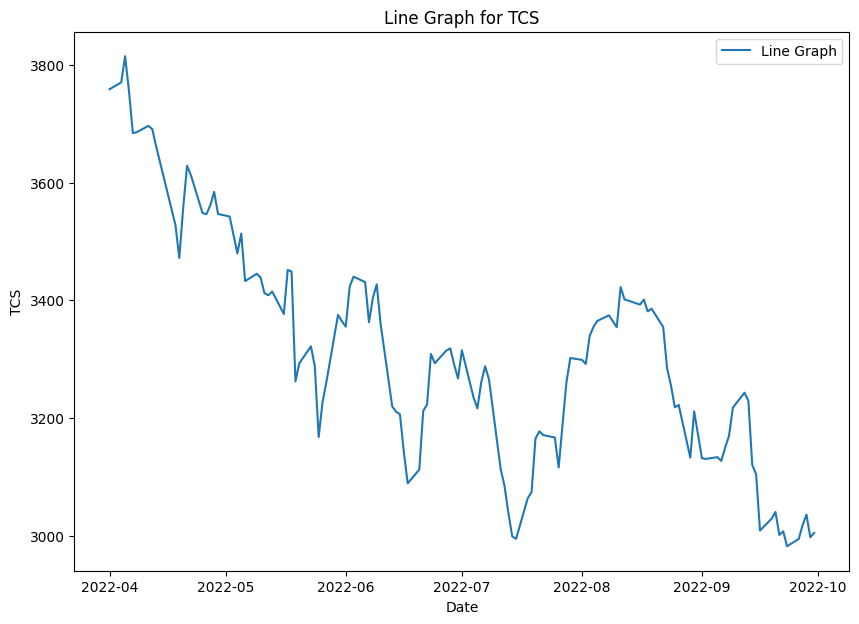

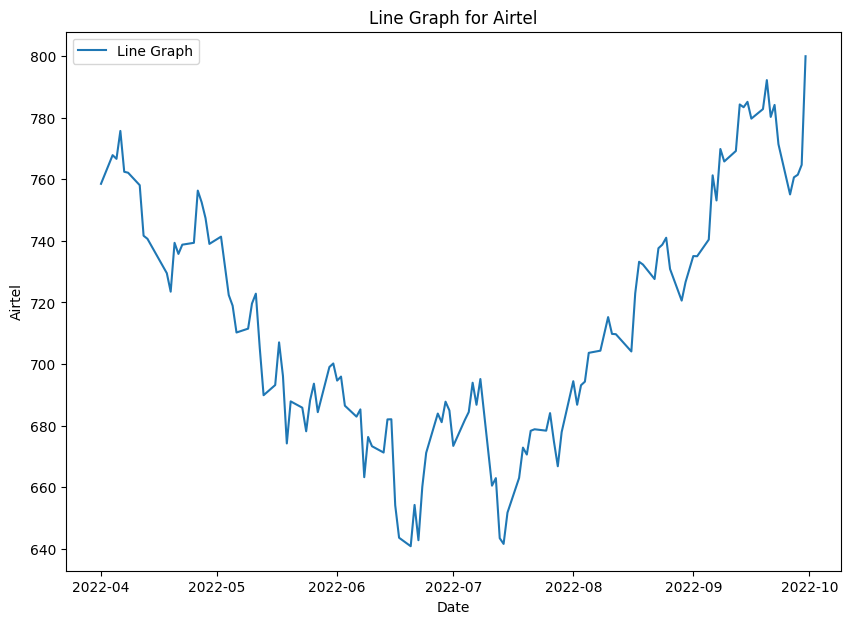

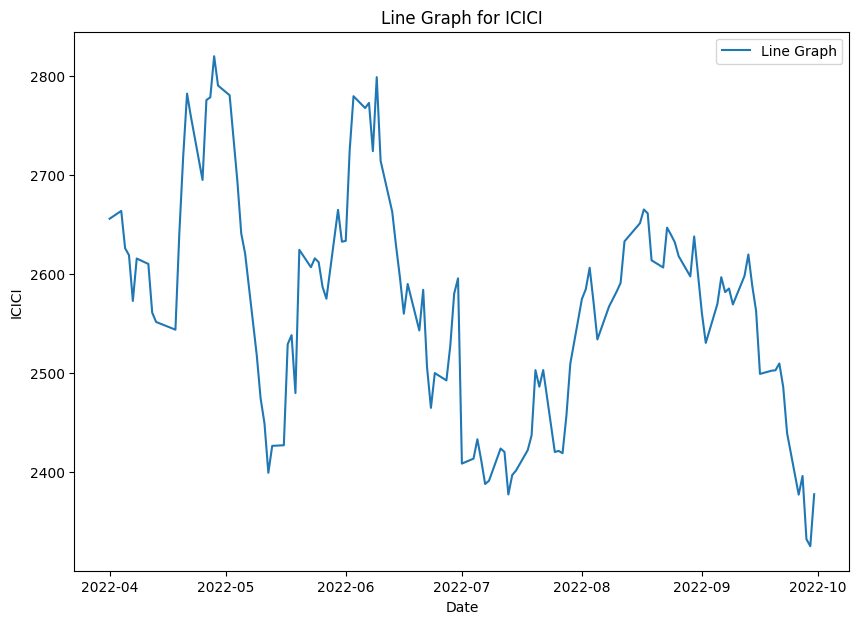

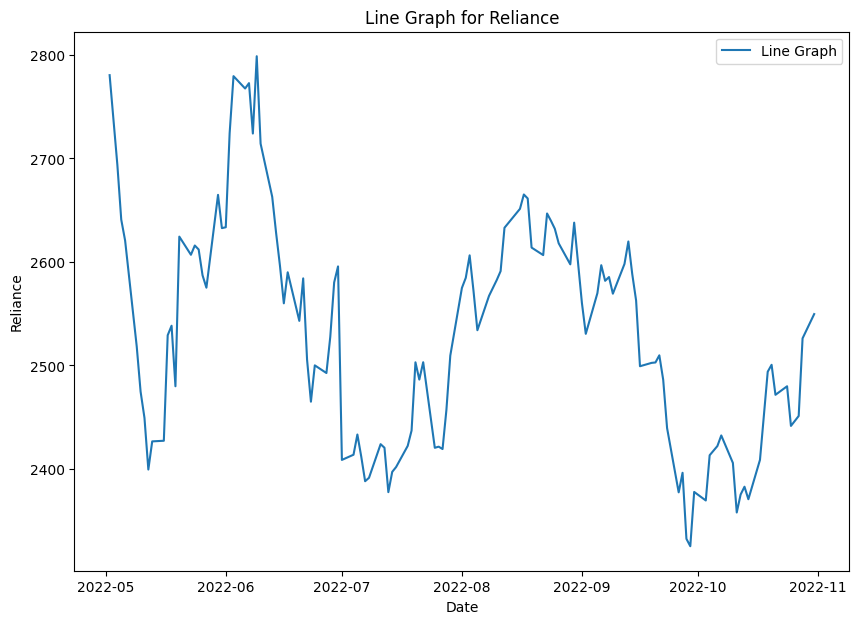

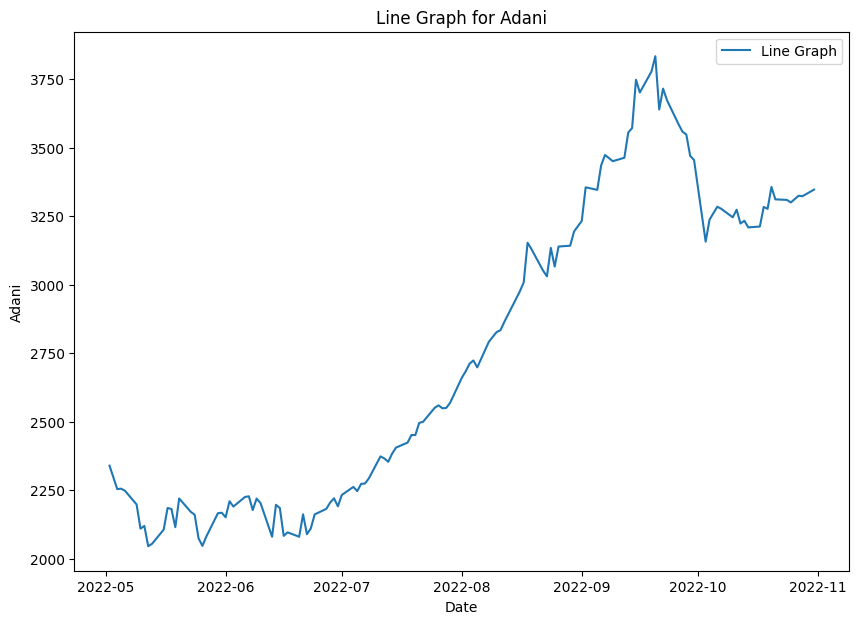

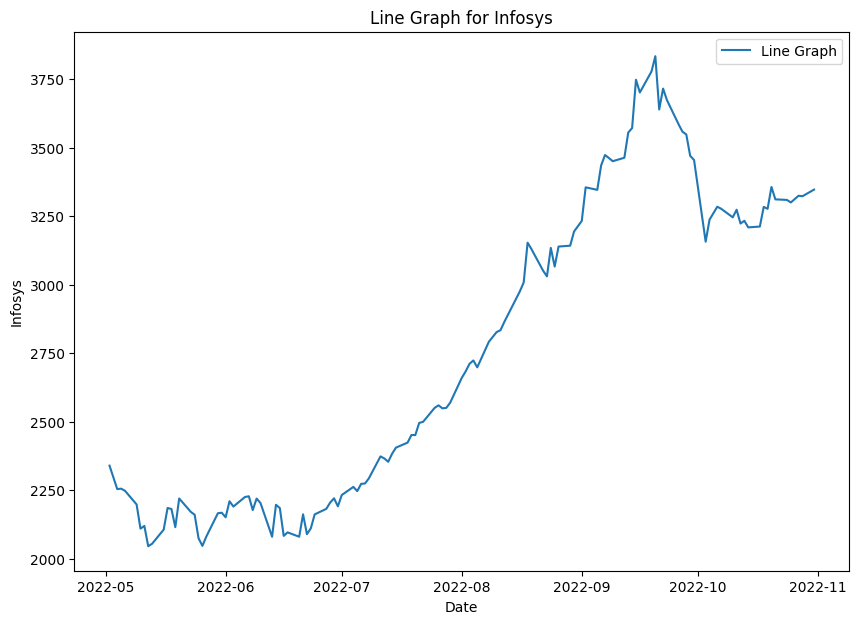

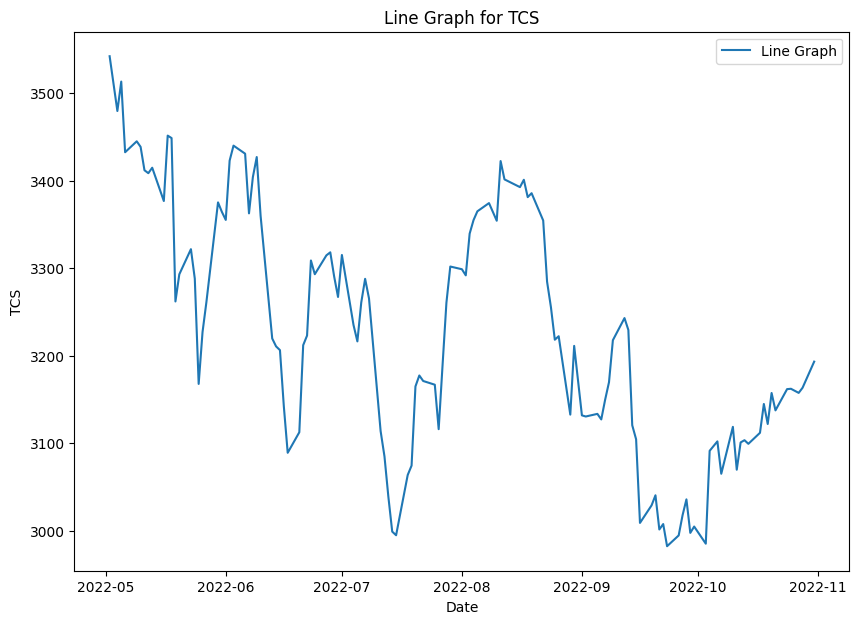

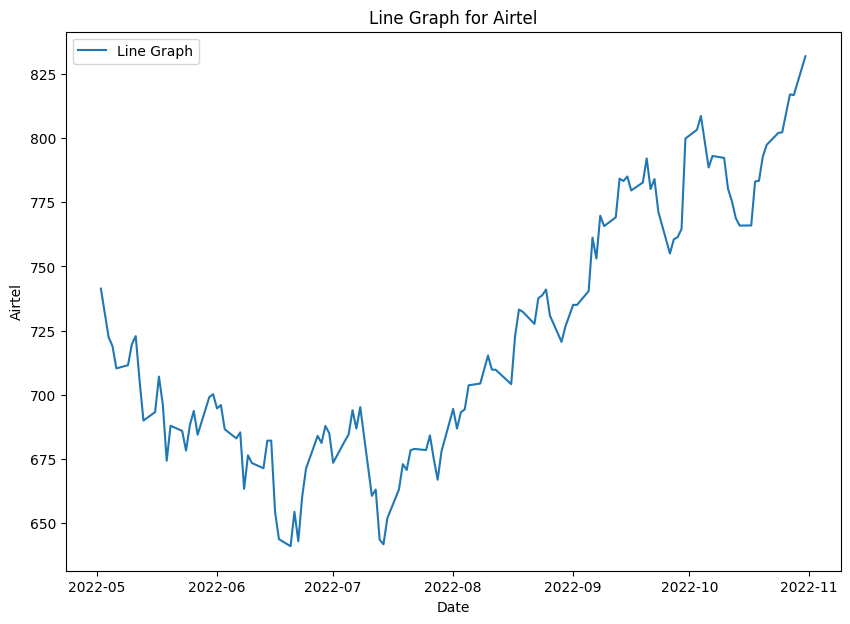

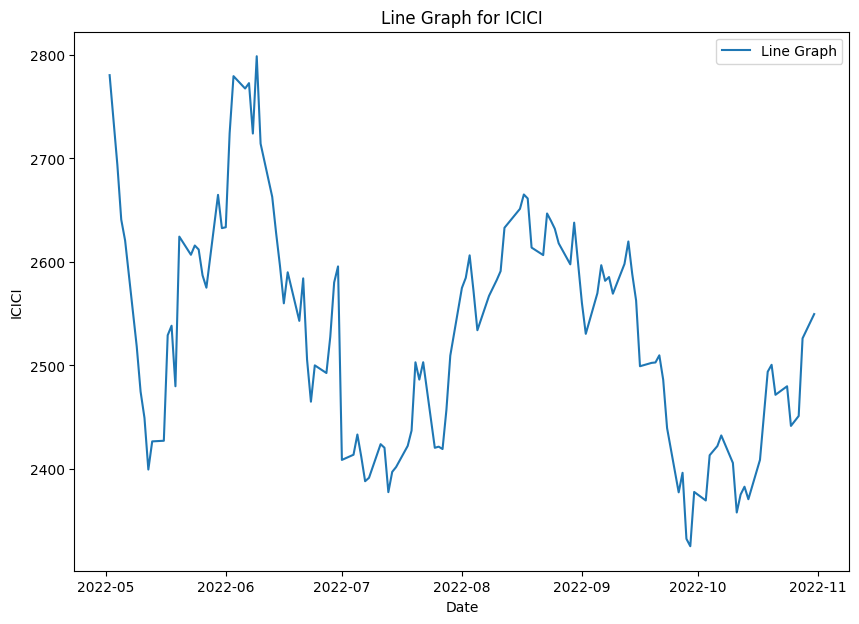

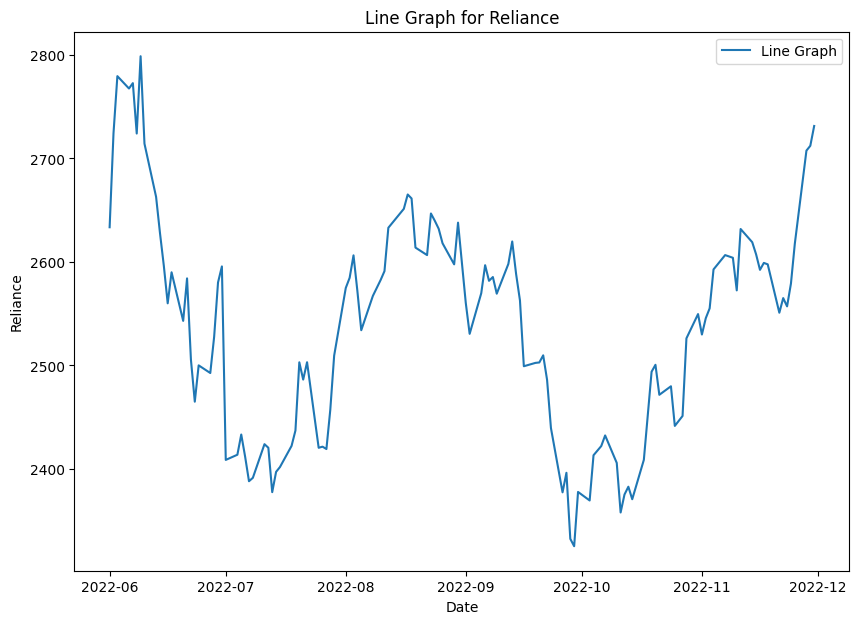

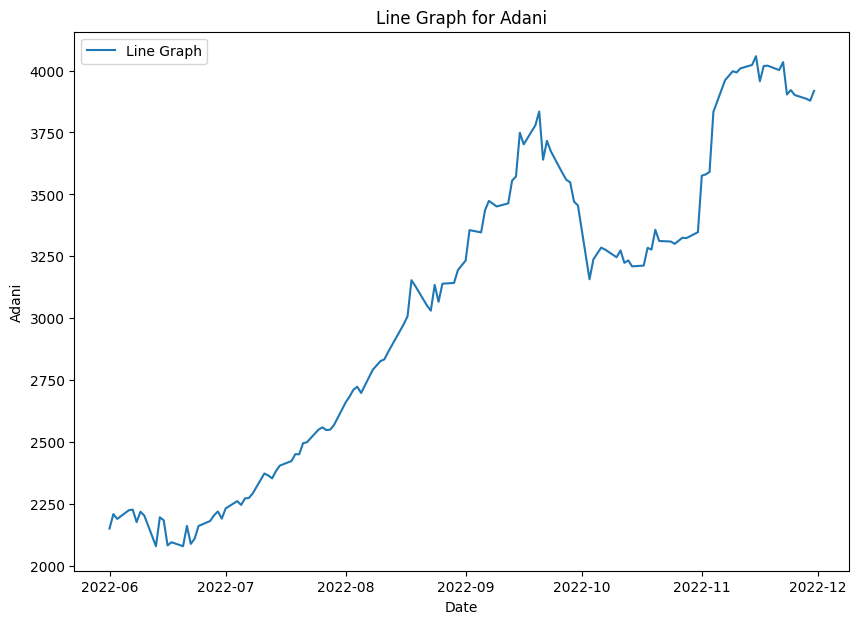

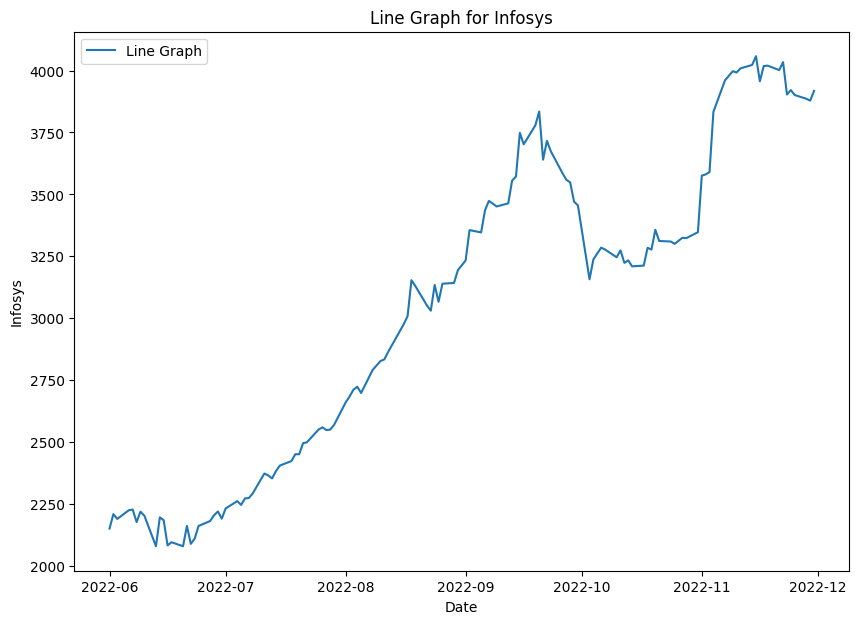

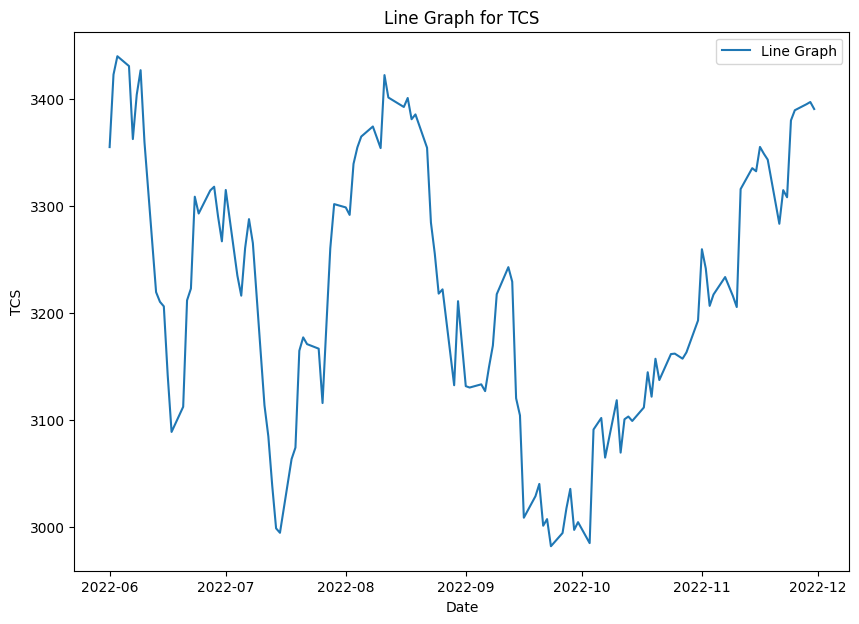

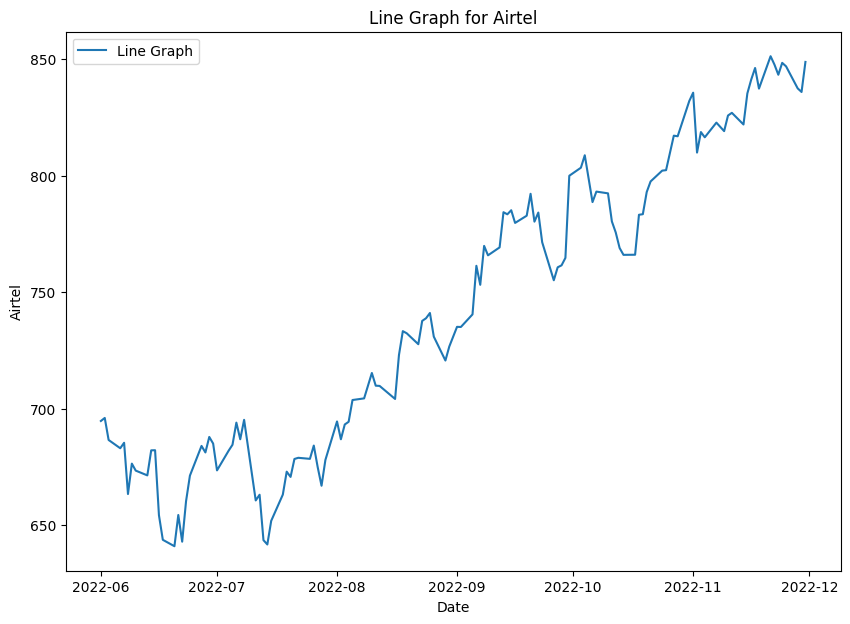

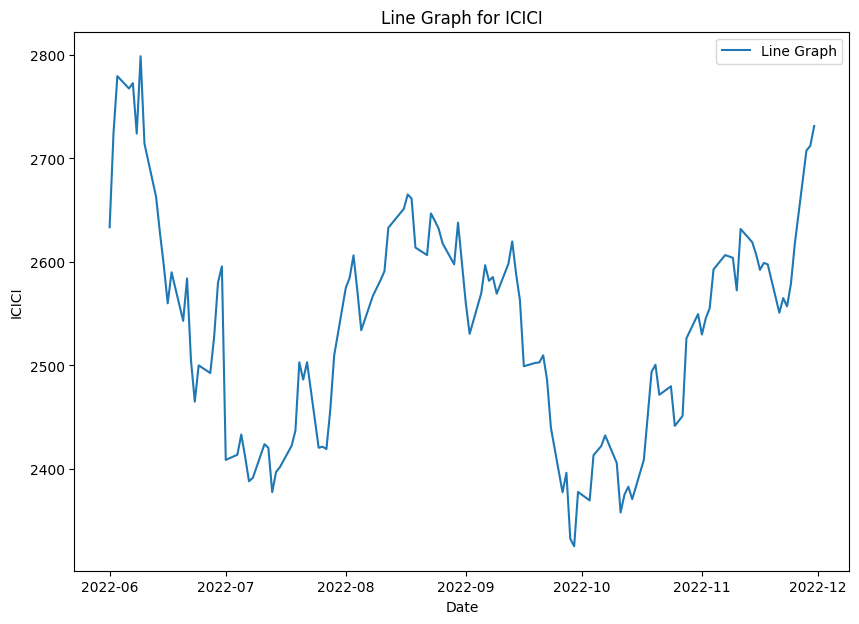

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of the six dataframes
period_dataframes = [stock_data_for_period_1, stock_data_for_period_2, stock_data_for_period_3, 
                     stock_data_for_period_4, stock_data_for_period_5, stock_data_for_period_6]

# Iterate over each period dataframe
for period_df in period_dataframes:
    # Iterate over each column except the 'Date' column
    for column in period_df.columns[1:]:
        plt.figure(figsize=(10, 7))
        sns.lineplot(data=period_df, x='Date', y=column, label="Line Graph")
        plt.title(f"Line Graph for {column}")
        plt.legend()

        # Set x-axis ticks for 21 evenly spaced dates
        num_labels_to_display = 21
        xticks_positions = plt.xticks()[0]

        # Ensure that there are enough ticks to display
        if len(xticks_positions) > num_labels_to_display:
            selected_xticks_positions = xticks_positions[::len(xticks_positions) // num_labels_to_display]
            selected_xticks_labels = pd.to_datetime(period_df['Date']).dt.strftime("%Y-%m-%d").tolist()[::len(period_df['Date']) // num_labels_to_display]

            plt.xticks(selected_xticks_positions, selected_xticks_labels, rotation=45)

    # Display the plots for each period
    plt.show()


In [63]:
stock_data_for_period_1 = stock_data_for_period_1.drop("Date", axis = 1)
stock_data_for_period_2 = stock_data_for_period_2.drop("Date", axis = 1)
stock_data_for_period_3 = stock_data_for_period_3.drop("Date", axis = 1)
stock_data_for_period_4 = stock_data_for_period_4.drop("Date", axis = 1)
stock_data_for_period_5 = stock_data_for_period_5.drop("Date", axis = 1)
stock_data_for_period_6 = stock_data_for_period_6.drop("Date", axis = 1)

# Returns Matrix

Calculating daily returns for each stock using "pandas".

In [64]:
daily_returns = stock_data_for_period_1.pct_change()
daily_returns = daily_returns.dropna()
daily_returns

,Reliance,Adani,Infosys,TCS,Airtel,ICICI
4508,0.022568,0.001077,0.001077,0.017550,0.008896,0.022568
4509,0.004678,-0.002065,-0.002065,-0.006127,0.003656,0.004678
4510,-0.021501,-0.001370,-0.001370,-0.013857,0.014857,-0.021501
4511,0.008070,-0.008172,-0.008172,0.012095,-0.008024,0.008070
4512,0.000821,0.031487,0.031487,0.006838,0.000355,0.000821
...,...,...,...,...,...,...
4625,0.014240,0.024214,0.024214,-0.004745,0.016662,0.014240
4626,-0.002960,0.009323,0.009323,0.006559,0.018996,-0.002960
4627,0.014061,0.010543,0.010543,0.001041,-0.004094,0.014061
4628,0.020750,0.007031,0.007031,-0.008333,0.009763,0.020750


# Mean Returns and Covariance Matrix

In [65]:
# Calculate mean return and covariance matrix
mean_returns = daily_returns.mean()
mean_returns_array = mean_returns.values
cov_matrix = daily_returns.cov()*252*20
cov_matrix_array = cov_matrix.values
cov_matrix_df = pd.DataFrame(cov_matrix_array)

# Convert mean_returns to a NumPy array
mean_weights = mean_returns.values

# Set the risk aversion parameter (lambda)
# risk_aversion = 0.8
cov_matrix_df.columns = ["Reliance", "Adani", "Infosys", "TCS", "Airtel", "ICICI"]
new_index = ["Reliance", "Adani", "Infosys", "TCS", "Airtel", "ICICI"]
cov_matrix_new_index = cov_matrix_df.set_index(pd.Index(new_index))

# Display the DataFrame with the new index
cov_matrix_new_index

,Reliance,Adani,Infosys,TCS,Airtel,ICICI
Reliance,1.836052,1.575514,1.575514,0.700766,0.645760,1.836052
Adani,1.575514,3.359131,3.359131,1.166416,1.151542,1.575514
Infosys,1.575514,3.359131,3.359131,1.166416,1.151542,1.575514
TCS,0.700766,1.166416,1.166416,1.311435,0.503416,0.700766
Airtel,0.645760,1.151542,1.151542,0.503416,1.349775,0.645760
ICICI,1.836052,1.575514,1.575514,0.700766,0.645760,1.836052


In [66]:
import tabulate
# Printing mean weights
v = stock_data.columns
l = mean_weights
mydata = []
for i in range(len(v)):
    a = []
    x = v[i]
    y = l[i] * 100
    a = [x,y]
    mydata.append(a)
head = ["Company", "Mean Returns"]

# display table
print(tabulate.tabulate(mydata, headers = head, tablefmt = "grid"))

+-----------+----------------+
| Company   |   Mean Returns |
+===========+================+
| Reliance  |     0.0809352  |
+-----------+----------------+
| Adani     |     0.233107   |
+-----------+----------------+
| Infosys   |     0.233107   |
+-----------+----------------+
| TCS       |    -0.114602   |
+-----------+----------------+
| Airtel    |     0.00574319 |
+-----------+----------------+
| ICICI     |     0.0809352  |
+-----------+----------------+


# Portfolio Optimization

Optimising without using Target returns.

Optimal weights: [1.30285171e-01 7.33455993e-15 4.87102221e-15 1.36251201e-01
 6.03170458e-01 1.30293171e-01]
Expected portfolio return: 1571.8642056351275
Portfolio volatility: 52.71576715335324
Sharpe Ratio: 29.81753449707963


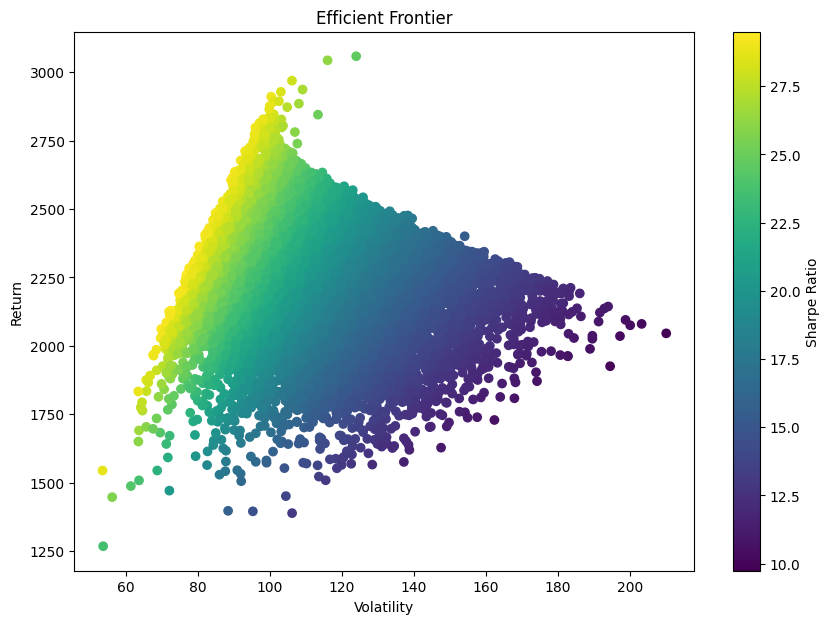

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the expected returns and covariance matrix for the given period
expected_returns = stock_data_for_period_1.mean()  # Mean returns
covariance_matrix = stock_data_for_period_1.cov()  # Covariance matrix

# Define the number of assets
num_assets = len(expected_returns)

# Define the objective function to minimize - negative of the Sharpe ratio
def objective_function(weights, expected_returns, covariance_matrix):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return -portfolio_return / portfolio_volatility

# Define the constraints
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Define the bounds for each weight (0 <= weight <= 1)
bounds = tuple((0, 1) for asset in range(num_assets))

# Initial guess for weights (equally weighted portfolio)
initial_weights = np.ones(num_assets) / num_assets

# Perform portfolio optimization
from scipy.optimize import minimize

result = minimize(
    objective_function,
    initial_weights,
    args=(expected_returns, covariance_matrix),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Display the optimized portfolio weights
print("Optimal weights:", result.x)

# Calculate the expected return and volatility of the optimized portfolio
portfolio_return = np.dot(result.x, expected_returns)
portfolio_volatility = np.sqrt(np.dot(result.x.T, np.dot(covariance_matrix, result.x)))
print("Expected portfolio return:", portfolio_return)
print("Portfolio volatility:", portfolio_volatility)

# Calculate the Sharpe Ratio
risk_free_rate = 0.01  # Assuming a risk-free rate of 5%
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
print("Sharpe Ratio:", sharpe_ratio)

# Plot the Efficient Frontier
returns = []
volatilities = []
for i in range(10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns.append(np.dot(weights, expected_returns))
    volatilities.append(np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights))))
returns = np.array(returns)
volatilities = np.array(volatilities)

plt.figure(figsize=(10, 7))
plt.scatter(volatilities, returns, c=returns / volatilities, marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()

# Now, for the second period, let's calculate the value of investment assuming we invest Rs. 100,000
# Assuming we invest equally in each stock
investment_value = 100000
weights_period_2 = np.ones(num_assets) / num_assets  # Equal weights for each stock

# Calculate the value of the investment after the second period
returns_period_2 = stock_data_for_period_2.iloc[-1, 1:].values  # Last row of data for period 2
#portfolio_value_period_2 = np.dot(weights_period_2, returns_period_2)
#investment_value_period_2 = investment_value * portfolio_value_period_2

#print("Investment value after period 2:", investment_value_period_2)

# Backtesting

Total returns: 1732.1860445813363


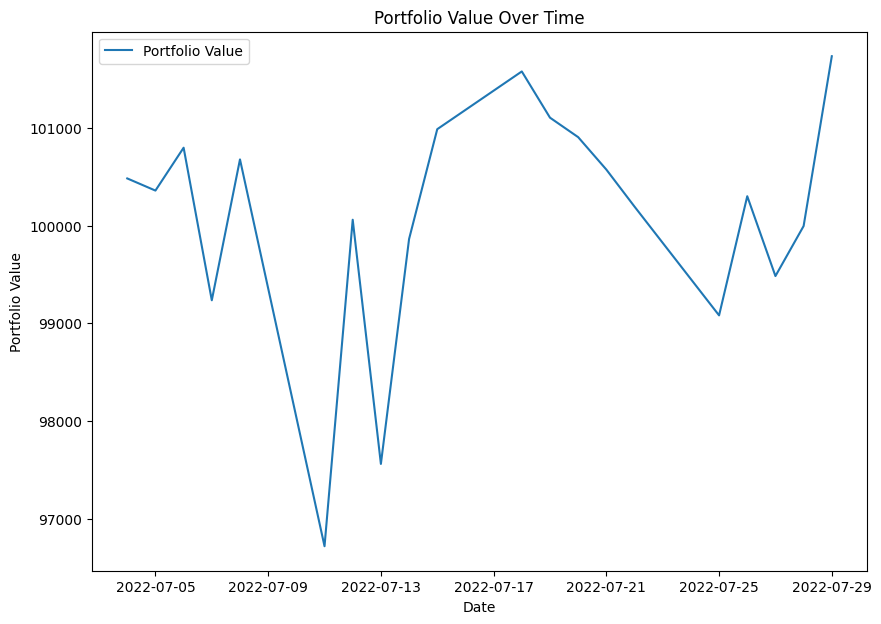

In [68]:
# Extracting data for the period from 2022-07-01 to 2022-07-30
start_date = '2022-07-01'
end_date = '2022-07-30'
selected_data_period_6 = Closing_Price[(Closing_Price['Date'] >= start_date) & (Closing_Price['Date'] <= end_date)]

# Calculate daily returns
selected_data_period_6.set_index('Date', inplace=True)
daily_returns_period_6 = selected_data_period_6.pct_change().dropna()

# Use the weights obtained from the previous optimization
optimal_weights = result.x

# Backtesting: Calculating the portfolio value over time
initial_investment = 100000  # Assuming initial investment amount
portfolio_value = np.zeros(len(daily_returns_period_6))

for i in range(len(daily_returns_period_6)):
    daily_returns_today = daily_returns_period_6.iloc[i]  
    portfolio_value[i] = initial_investment * (1 + np.dot(optimal_weights, daily_returns_today))

# Total returns
total_returns = portfolio_value[-1] - initial_investment

print("Total returns:", total_returns)

# Creating a DataFrame to store the portfolio value over time
portfolio_value_df = pd.DataFrame(portfolio_value, index=daily_returns_period_6.index, columns=['Portfolio Value'])

# Plotting the portfolio value over time
plt.figure(figsize=(10, 7))
plt.plot(portfolio_value_df.index, portfolio_value_df['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()


In [69]:
v = stock_data.columns
l = result.x
mydata = []
for i in range(len(v)):
    a = []
    x = v[i]
    y = l[i]*100
    a = [x,y]
    mydata.append(a)
head = ["Company", "Portfolio Percentage weights"]

# displaying Portfolio Percentage Weights through the table
print(tabulate.tabulate(mydata, headers = head, tablefmt = "grid"))

+-----------+--------------------------------+
| Company   |   Portfolio Percentage weights |
+===========+================================+
| Reliance  |                   13.0285      |
+-----------+--------------------------------+
| Adani     |                    7.33456e-13 |
+-----------+--------------------------------+
| Infosys   |                    4.87102e-13 |
+-----------+--------------------------------+
| TCS       |                   13.6251      |
+-----------+--------------------------------+
| Airtel    |                   60.317       |
+-----------+--------------------------------+
| ICICI     |                   13.0293      |
+-----------+--------------------------------+


# Efficient Frontier

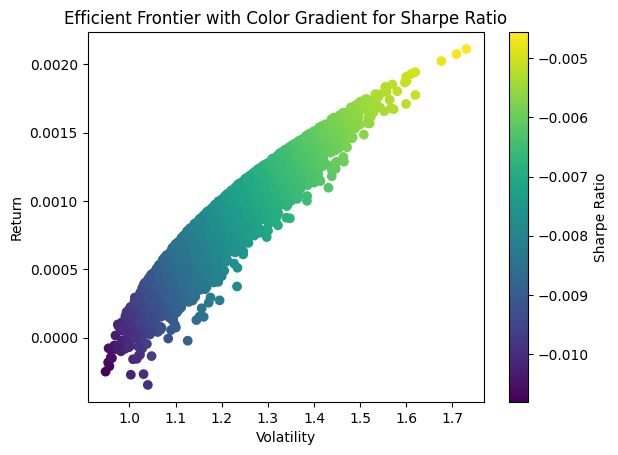

In [70]:
# Calculate the volatility of the optimal portfolio
portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(covariance_matrix, optimal_weights)))

# Simulate portfolios for the efficient frontier
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
risk_free_rate = 0.01  # replace with your risk-free rate
for i in range(num_portfolios):
    weights = np.random.random(len(v))
    weights /= np.sum(weights)
    
    # Calculate portfolio return using the Sharpe ratio formula
    portfolio_return = np.dot(mean_returns_array, weights)
    excess_return = portfolio_return - risk_free_rate
    portfolio_sharpe_ratio = excess_return / np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_sharpe_ratio

# Plot the efficient frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap="viridis", marker="o")
plt.title("Efficient Frontier with Color Gradient for Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.colorbar(label="Sharpe Ratio")
plt.show()
